## draft for run_create_plots()

In [21]:
import pandas as pd
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [81]:
def create_matrix(file_name, tab):
    """
    creates matrix (length of indel, position) = number of such indels
    """
    
    df_indels = pd.read_excel(file_name, sheet_name=tab)
    container = []
    
    for col in df_indels.columns: 
        indels_total = df_indels.loc[ : , col].tolist()
        lengths = list(set(indels_total))
        lengths = (x for x in lengths if x==x) # deleting 'nan'
        d = OrderedDict()
        
        for length in lengths:
            d[length] = indels_total.count(length)
        container.append(d)
                      
    indel_matrix = pd.DataFrame(container)
    
    # adding missing values to df columns with empty values
    # as we don't have all lengths of indels
    # it's for accurate plots
    max_col_ind = int(max(indel_matrix.columns))
    for i in range(1, max_col_ind):
        if i not in indel_matrix.columns:
            indel_matrix[i] = np.nan # adding missing value ('indel length') to column with empty values

    indel_matrix = indel_matrix.T
    indel_matrix.sort_index(axis=0, ascending=False, inplace=True)
    indel_matrix.columns = df_indels.columns
    
    return indel_matrix
                      
    
def get_coverage(file_name):
    """takes out coverage value from
    excel file
    """
    df_cov = pd.read_excel(file_name, 2)
    cov = int(df_cov["coverage"])
    
    return cov
    
    
def create_bars(df, cov):
    raw_del_count = df.sum(axis=0)
    fig_raw_count = plt.figure(figsize=(20, 7))
   

    plt.bar(raw_del_count.index, raw_del_count)
    plt.xticks(list(range(len(raw_del_count))), list(range(1, len(raw_del_count)+1)))
    
    plt.title("all deletion count irrespective deletion length", fontsize=25)
    plt.xlabel("nuc pos", fontsize=25)
    plt.ylabel("count", fontsize=25)
    plt.show()
    


def create_bars_percent(df, cov, file_name):
    raw_del_count = df.sum(axis=0)
    fig_del_percent = plt.figure(figsize=(20, 7))
    perc_del_count = raw_del_count / cov * 100

    plt.bar(perc_del_count.index, perc_del_count)
    plt.xticks(list(range(len(raw_del_count))), list(range(1, len(raw_del_count)+1)))
    
    plt.title("deletion percent", fontsize=25)
    plt.xlabel("nucleotide position", fontsize=25)
    plt.ylabel("percent", fontsize=25)
    #plt.show() # comment to save figure, otherwise it'll save blank file
    
    fig_del_percent.savefig(file_name.rsplit(".", 1)[0] + ".png")
    plt.close() # comment to show the figure in the jupyter or wherever  # <<<<<<<<<<<<<<<<INTO CHEET SHEET
    
    
    
    

In [82]:
create_bars_percent(matrix, coverage, "DK-14-3_S220_R1_1_1,096,545R.xlsx" )

In [55]:
# taking 0 tab to get deletion matrix
matrix = create_matrix("DK-14-3_S220_R1_1_1,096,545R.xlsx", 0)

In [56]:
coverage = get_coverage("DK-14-3_S220_R1_1_1,096,545R.xlsx")

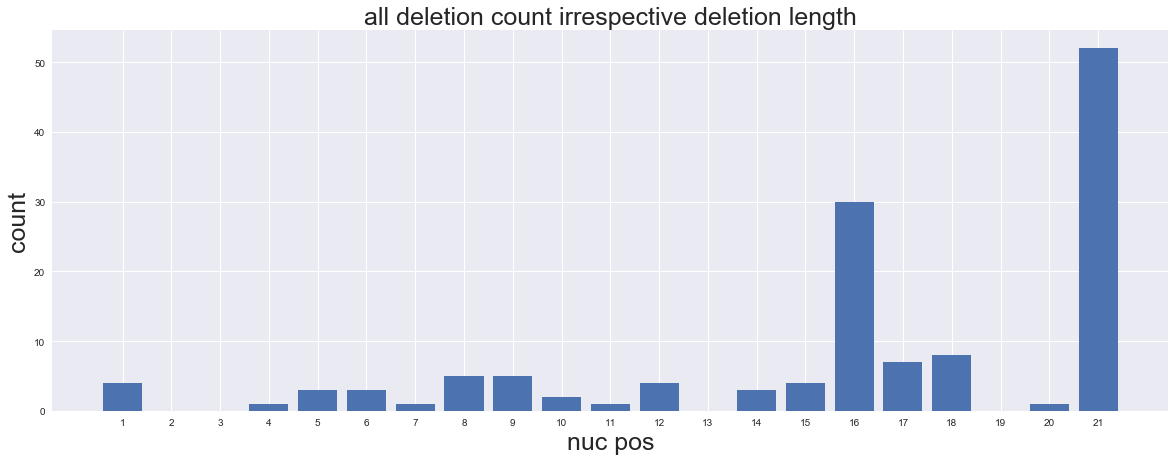

In [57]:
create_bars(matrix, coverage)